In [11]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Alpha_MDO import *
import seaborn as sns

lot = loteria(0.1e6)
df = lot.gen_dados()
df['Desvio_CP'] = df['CP_prev']-df['CP_real']
df['Desvio_PV'] = df['PV_prev']-df['PV_real']

df.to_csv('D:\espaco_amostral_pratico.xlsx')

100%|██████████| 100000/100000 [00:08<00:00, 12390.66it/s]


In [13]:
df.head(3)

,PV_prev,PV_real,CP_prev,CP_real,NR,NR_max,tempo,resultados,Desvio_CP,Desvio_PV
0,2.916531,3.301064,15.087610,7.978706,123.020986,185.0,106.444117,221.594814,7.108904,-0.384533
1,2.825402,1.703438,17.609450,10.938920,181.898490,185.0,28.306803,331.919107,6.670530,1.121964
2,1.618539,3.349825,11.032444,7.741193,109.925682,185.0,47.843793,210.496764,3.291251,-1.731286


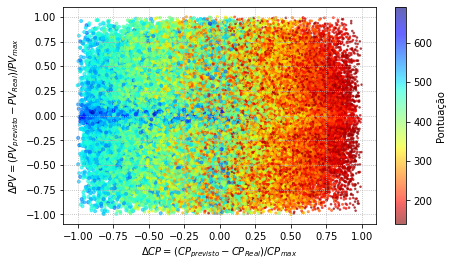

In [37]:
#Muito bom
fig, ax = plt.subplots(figsize=(7, 4))
ax.set(xlabel=r'$\Delta CP=(CP_{previsto}-CP_{Real})/CP_{max}$', ylabel=r'$\Delta PV=(PV_{previsto}-PV_{Real})/PV_{max}$')
e = ax.scatter( df.Desvio_CP/max(df.Desvio_CP), df.Desvio_PV/max(df.Desvio_PV), marker='o', alpha=.6,  
                c=df.resultados, cmap='jet_r', s= df.resultados/max(df.resultados)*12, rasterized=True)
cbar = plt.colorbar(e)
cbar.set_label('Pontuação')
ax.grid(ls='dotted')
fig.savefig(f'desvios.pdf', bbox_inches='tight', dpi=200)

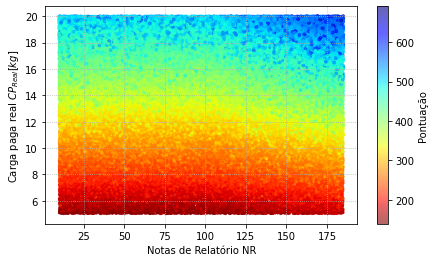

In [36]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set(xlabel='Notas de Relatório NR', ylabel=r'Carga paga real $CP_{Real}[kg]$')
e = ax.scatter( df.NR, df.CP_real, marker='o', alpha=.6,  
                c=df.resultados, cmap='jet_r', s= df.resultados/max(df.resultados)*10, rasterized=True)
cbar = plt.colorbar(e)
cbar.set_label('Pontuação')
ax.grid(ls='dotted')
fig.savefig(f'CP_real.pdf', bbox_inches='tight', dpi=200)